### Questions
- What differentiates hetereoskedacicity vs homoskedacsticity 

Datasets:

- Weather Data set found [here](https://www.kaggle.com/budincsevity/szeged-weather)

### Objectives
YWBAT
* Apply techniques to solve a multiple linear regression problem
* Create multilinear regression models and change them to optimize results

### Outline
- Clone lesson repo to your local
- Breakout groups to build a model
    - both people should be coding
    - 1 person can screenshare
    - you can divide work (divide and conquer!)
    - Save 5-8 minutes to write a conclusion
- Present model to the class (conclusion)

In [61]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, make_scorer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

### Task, build a model in 35-40 minutes and present it to the class 
Dataset - ```BNG_cholesterol.csv ```

Target - ```chol```

No. Features - ```13```

In [2]:
df = pd.read_csv("./data/BNG_cholesterol.csv")
df.head()

age  sex  cp    trestbps  fbs  restecg     thalach  exang   oldpeak  \
0  46.950938    1   1  165.981331    0        2  152.691434      0  1.774223   
1  47.359284    1   4  134.748286    0        2  132.079047      1  0.407640   
2  58.455787    1   4  129.456617    0        0  164.523754      1  5.284900   
3  56.070298    1   4  124.831749    0        2  181.453944      0  1.096476   
4  44.121116    1   4  109.887955    0        2  110.055090      1  0.437412   

   slope  ca  thal  num        chol  
0      2   0     7    3  265.569780  
1      2   0     7    0  269.368061  
2      2   0     7    4  244.336917  
3      1   1     7    2  237.985356  
4      2   0     3    1  245.907334

In [3]:
df.shape

(1000000, 14)

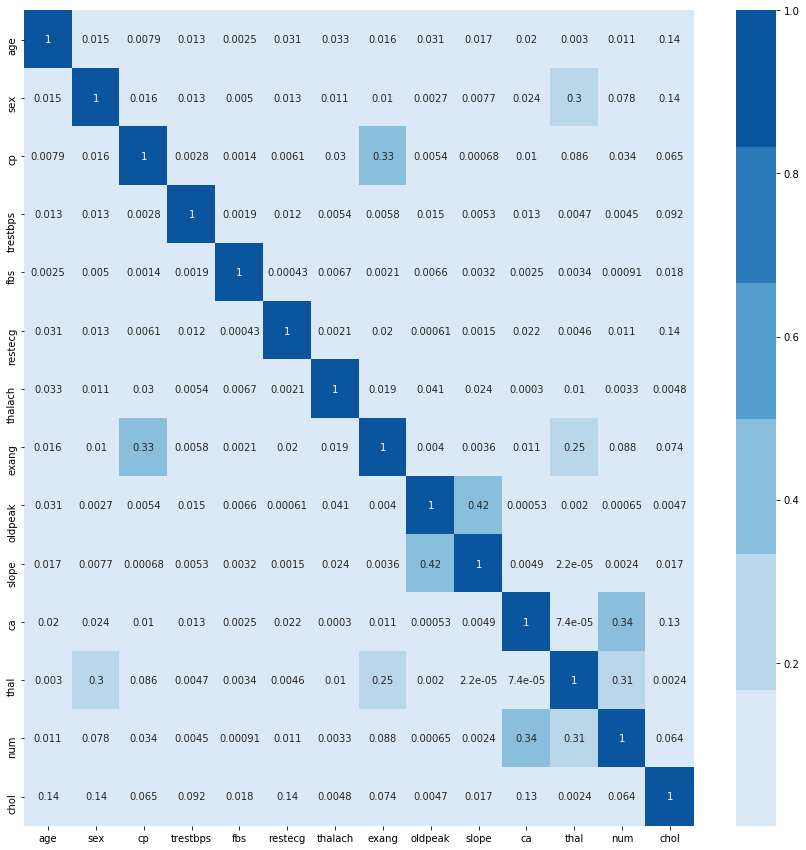

In [5]:
corr = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr.abs(), annot=True, cmap=sns.color_palette('Blues'))
plt.show()

### What makes for good AIC/BIC?
The lowest AIC/BIC

- Akaike’s Inflation Coefficient
- Bayes Inflation Coefficient - penalizes for number of features

BIC - the leanest/meanest (low -> best) - penalizes features

AIC - go between (accounting for explanation of variance and takes into account the sample size)

### Tools to use

> BoxCox will fit x to y in a linear relationship because it shows transformation needed to make x and y morenormally related

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

>VIF (Variance Inflation Factor)

https://etav.github.io/python/vif_factor_python.html

In [40]:
def make_ols(df, target='chol', columns_to_use = ['age', 'thalach'], 
             add_constant=False, display_summary=False,
             display_vif=True):
    X = df[columns_to_use]
    y = df[target]
    if add_constant:
        X = sm.add_constant(X)
    linreg = sm.OLS(y, X).fit()
    if display_summary:
        display(linreg.summary())
    if display_vif:
        print(1 / (1 - linreg.rsquared))
    return linreg

In [20]:
linreg = make_ols(df, display_summary=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chol   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          9.662e+06
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        13:29:22   Log-Likelihood:                     -5.4429e+06
No. Observations:             1000000   AIC:                                  1.089e+07
Df Residuals:                  999998   BIC:                                  1.089e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            2.5407      0.004    567.740      0.000       2.532       2.549
thalach        0.7082      0.002    433.499      0.000       0.705       0.711
==============================================================================
Omnibus:                    61638.553   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76647.024
Skew:                           0.605   Prob(JB):                         0.00
Kurtosis:                       3.612   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
residuals = linreg.resid

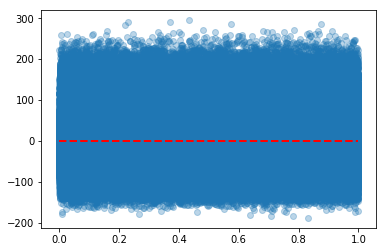

In [15]:
xs = np.linspace(0, 1, len(residuals))
plt.scatter(xs, residuals, alpha=0.3)
plt.hlines(y=0, xmin=0, xmax=1, linestyle='dashed', colors='r', linewidth=2)
plt.show()

In [17]:
linreg.rsquared

0.9507964500843937

### Track your model stats in stepwise selection:
{mod1: {features_used:[], p_values:[], AIC:[], BIC:[], JB:[]}}

### Clean Data

In [16]:
# our data is cleaned

### Correlation Matrix + Interpretation

In [ ]:
# see above

### Baseline Model Using scipy.stats

In [ ]:
# see above

### Baseline Model Using sklearn

### let's look for multicollinearity in our variables using VIF

# what is multicollinearity
- the independent variables are correlated
- it's bad
- doesn't always have to be independent, but for the sake of modeling, it is usually independent
- doubling information for one variable
- selected features have a positive relationship amongst themselves and the target
- 2 or more variables
- when 2 features are more related to each other than they are the target
- when 1 variable can be explained using the other variables with a R2

### Iterate through features, looking at R2, then VIF

In [24]:
# let's check each column, build a model and get the r2
vif_scores = []

for column in df.columns:
    columns_to_use = df.drop(columns=[column, 'chol']).columns
    target = column
    linreg = make_ols(df, target=target, columns_to_use=columns_to_use)
    R2 = linreg.rsquared
    VIF = 1 / (1 - R2)
    print(f"VIF for {column} = {VIF}")
    vif_scores.append((column, VIF, R2))

VIF for age = 29.151688922207345
VIF for sex = 3.4938619746931736
VIF for cp = 11.966992904577227
VIF for trestbps = 37.60716784357191
VIF for fbs = 1.1802127024523554
VIF for restecg = 2.0109361058659707
VIF for thalach = 30.30625597942151
VIF for exang = 1.8121210852367335
VIF for oldpeak = 2.53730743815354
VIF for slope = 9.143351318503155
VIF for ca = 1.7577404077694698
VIF for thal = 9.17384484870623
VIF for num = 2.199873413962072
VIF for chol = 24.40102185834321


In [31]:
vif_scores_sorted = sorted(vif_scores, key=lambda x: x[1])
vif_scores_sorted

[('fbs', 1.1802127024523554, 0.15269510493989158),
 ('ca', 1.7577404077694698, 0.4310877786163112),
 ('exang', 1.8121210852367335, 0.4481604964773306),
 ('restecg', 2.0109361058659707, 0.5027191579667971),
 ('num', 2.199873413962072, 0.5454283898095051),
 ('oldpeak', 2.53730743815354, 0.6058814217926527),
 ('sex', 3.4938619746931736, 0.7137837707261407),
 ('slope', 9.143351318503155, 0.8906309114496862),
 ('thal', 9.17384484870623, 0.8909944503649385),
 ('cp', 11.966992904577227, 0.9164368185078883),
 ('chol', 24.40102185834321, 0.9590181097412492),
 ('age', 29.151688922207345, 0.9656966701768619),
 ('thalach', 30.30625597942151, 0.9670035123877058),
 ('trestbps', 37.60716784357191, 0.973409324409657)]

In [32]:
vif_scores_sorted_top5 = [x[0] for x in vif_scores_sorted[:5]]
vif_scores_sorted_top5

['fbs', 'ca', 'exang', 'restecg', 'num']

In [33]:
make_ols(df, columns_to_use=vif_scores_sorted_top5, display_summary=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chol   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                          5.129e+05
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        13:39:47   Log-Likelihood:                     -6.3133e+06
No. Observations:             1000000   AIC:                                  1.263e+07
Df Residuals:                  999995   BIC:                                  1.263e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fbs           80.7102      0.361    223.567      0.000      80.003      81.418
ca            40.9546      0.147    279.097      0.000      40.667      41.242
exang         96.6010      0.266    363.064      0.000      96.080      97.123
restecg       71.9955      0.115    624.997      0.000      71.770      72.221
num           30.8607      0.100    307.692      0.000      30.664      31.057
==============================================================================
Omnibus:                     6258.949   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5426.785
Skew:                          -0.129   Prob(JB):                         0.00
Kurtosis:                       2.747   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### If you have a good predictor column, you gotta fight for it
- build a model of your columns against the one you are investigating
    - top5 results vs age
- check that r2 score

In [41]:
target = 'age'
columns_to_use = ['ca', 'num']


make_ols(df, columns_to_use=columns_to_use, target=target, display_summary=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    age   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.476
Method:                 Least Squares   F-statistic:                          4.544e+05
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        13:45:45   Log-Likelihood:                     -5.1070e+06
No. Observations:             1000000   AIC:                                  1.021e+07
Df Residuals:                  999998   BIC:                                  1.021e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ca            14.7943      0.043    346.492      0.000      14.711      14.878
num           14.2018      0.028    509.154      0.000      14.147      14.256
==============================================================================
Omnibus:                    69938.310   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79666.750
Skew:                          -0.668   Prob(JB):                         0.00
Kurtosis:                       2.643   Cond. No.                         2.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.9087224143204269


Removed 'fbs','exang', 'restecg' from our data because it caused high VIF with age

### After removing columns that caused high VIF, we're retrying this with age

In [43]:
target = 'chol'
columns_to_use = ['age', 'ca', 'num']


make_ols(df, columns_to_use=columns_to_use, target=target, display_summary=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chol   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          1.611e+07
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        13:48:03   Log-Likelihood:                     -5.5290e+06
No. Observations:             1000000   AIC:                                  1.106e+07
Df Residuals:                  999999   BIC:                                  1.106e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            4.4303      0.001   4013.557      0.000       4.428       4.432
==============================================================================
Omnibus:                    37942.779   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44089.212
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       3.462   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

17.108654670202913


In [45]:
# consider using only age, since there can't be multicollniearity

make_ols(df, columns_to_use=['age'], display_summary=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chol   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          1.611e+07
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        13:48:51   Log-Likelihood:                     -5.5290e+06
No. Observations:             1000000   AIC:                                  1.106e+07
Df Residuals:                  999999   BIC:                                  1.106e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            4.4303      0.001   4013.557      0.000       4.428       4.432
==============================================================================
Omnibus:                    37942.779   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44089.212
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       3.462   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

17.108654670202913


### Even though age has a high R2 by itself, it might be worth using the signals of the other metrics


In [58]:
make_ols(df, columns_to_use=vif_scores_sorted_top5, display_summary=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chol   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                          5.129e+05
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        13:57:28   Log-Likelihood:                     -6.3133e+06
No. Observations:             1000000   AIC:                                  1.263e+07
Df Residuals:                  999995   BIC:                                  1.263e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fbs           80.7102      0.361    223.567      0.000      80.003      81.418
ca            40.9546      0.147    279.097      0.000      40.667      41.242
exang         96.6010      0.266    363.064      0.000      96.080      97.123
restecg       71.9955      0.115    624.997      0.000      71.770      72.221
num           30.8607      0.100    307.692      0.000      30.664      31.057
==============================================================================
Omnibus:                     6258.949   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5426.785
Skew:                          -0.129   Prob(JB):                         0.00
Kurtosis:                       2.747   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.5642688469425305


### Cross Validate

In [53]:
reg = LinearRegression(fit_intercept=True)
cv = cross_val_score(reg, df[vif_scores_sorted_top5], y=df['chol'], cv = 5, scoring=make_scorer(r2_score), verbose=1, n_jobs=-1)
cv, cv.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


(array([0.04223019, 0.04125387, 0.0409972 , 0.04301219, 0.04126768]),
 0.04175222693576415)

In [54]:
X = df[vif_scores_sorted_top5]
y = df['chol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [59]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-5.6611375868985245

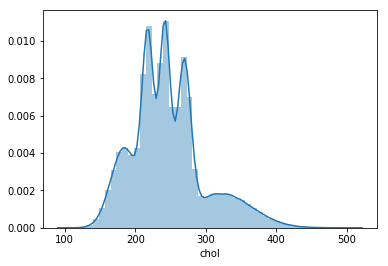

In [60]:
sns.distplot(df['chol'])
plt.show()

### Let's apply a standard scaler to our data

In [62]:
ss = StandardScaler()

In [63]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
X_ss_train = ss.transform(X_train)
X_ss_test = ss.transform(X_test)

In [69]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_ss_train, y_train)
reg.score(X_ss_test, y_test)

0.040544982359357884

In [70]:
X_ss = ss.fit_transform(X)

In [71]:
linreg = sm.OLS(df['chol'], X).fit()

In [72]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chol   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                          5.129e+05
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        14:02:07   Log-Likelihood:                     -6.3133e+06
No. Observations:             1000000   AIC:                                  1.263e+07
Df Residuals:                  999995   BIC:                                  1.263e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fbs           80.7102      0.361    223.567      0.000      80.003      81.418
ca            40.9546      0.147    279.097      0.000      40.667      41.242
exang         96.6010      0.266    363.064      0.000      96.080      97.123
restecg       71.9955      0.115    624.997      0.000      71.770      72.221
num           30.8607      0.100    307.692      0.000      30.664      31.057
==============================================================================
Omnibus:                     6258.949   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5426.785
Skew:                          -0.129   Prob(JB):                         0.00
Kurtosis:                       2.747   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What did we learn?
- How to find which features are causing multicollinearity
- Check to see if it's possible to use good predictors
- multicollinearity means when 1 variable can be explained using the other variables with a high r2

### Assessment